<a href="https://colab.research.google.com/github/Jose-Bruno/ProcessamentoDigitalDeImagens/blob/main/Projeto_Final_Jos%C3%A9_Bruno_da_Silva_Santos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

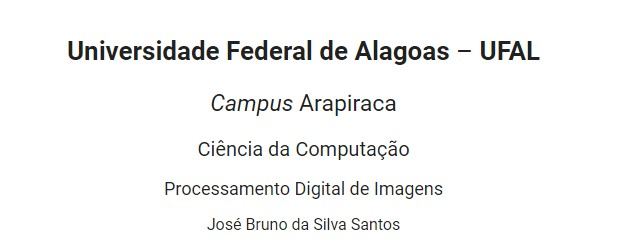

# **Descrição do Projeto**


> O projeto tem como objetivo mostrar algumas operações morfológicas, essas
operações são aplicadas a etapa de pré ou pós processamento, nesse tipo
operação existe uma matriz, máscara ou também elementos estruturantes que
percorrem a imagem e analisa um pixel e seus vizinhos, ao fazer essa análise é
realizada algumas operações como erosão, dilatação, abertura e fechamento,
através de manipulação de pixels. A seguir será dado exemplos dessas operações.




# **Video da Explicação**



> Para assistir o video da explicação do projeto clique [aqui](https://drive.google.com/file/d/1qkcbGGWrZajwjHNStpwPT_UtQej1qBBl/view?usp=sharing)



# **Morfologia Matemática para Processamento Digital de Imagens**


> Morfologia matemática para processamento de imagem é uma ferramenta
matemática que utiliza-se dos conceitos de teoria dos conjuntos para manipular
imagens com o objetivo de remover elementos indesejados, extrair componentes
desejadas, etc. Por tanto, essa é uma ferramenta muito interessante de ser utilizada
nas etapas de pré-processamento de imagens.


> Os exemplos utilizados aqui, estão levando em consideração um espaço euclidiano
bidimensional. Por tanto, estamos trabalhando com imagens binárias onde 1 = pixel
branco e 0 = pixel preto (o que caracteriza uma imagem binária).





# **Elementos básicos para realizar operações de morfologia matemática**


> Basicamente, precisamos de dois elementos para realizar uma operação de
morfologia matemática. O primeiro deles é um conjunto A qualquer, cujo (x,y) que
pertencem ao conjunto estão representados pelos pixels brancos da imagem. E o
segundo, é um elemento estruturante. Que nada mais é, que um arranjo matricial.
Durante nossos exemplos, vamos utilizar em maior parte um elemento retangular,
porém, outros elementos também podem ser utilizados como elipsóide e em formato
de cruz.



In [168]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [169]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Imagens Utilizadas***



In [163]:
imagem  = "/content/drive/MyDrive/Colab Notebooks/Imagens/image.png"
image_abertura = "/content/drive/MyDrive/Colab Notebooks/Imagens/abertura.png"
image_fechamento = "/content/drive/MyDrive/Colab Notebooks/Imagens/fechamento.png"

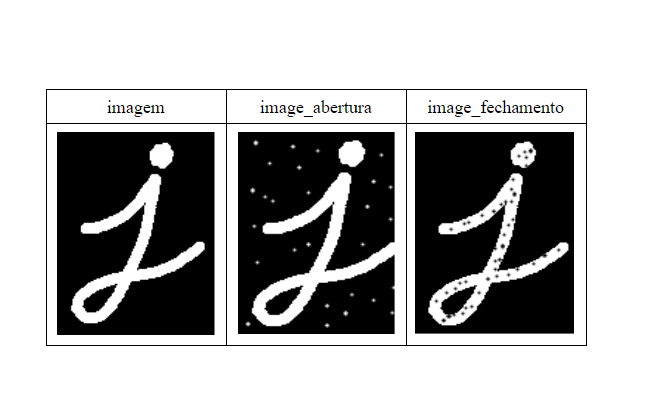

In [170]:
structure_element = [[255,255,255,255,255],[255,255,255,255,255],[255,255,255,255,255],[255,255,255,255,255],[255,255,255,255,255]]

# **Binarizar a imagem**

In [171]:
def binarize(image):
    img = cv2.imread(image, 0)
    convert= np.where((img <= 127), img, 255)
    convert_white = np.where((convert > 127), convert, 0)
    return convert_white

# **Erosão**


> A operação de erosão, funciona de forma análoga a uma erosão de solo. Teremos
uma porção de solo que é representado por todos os (x,y) pertencentes ao nosso
conjunto A, e teremos um fluido que é representado pelo elemento estruturante.
Quando o fluido for passando pela borda do solo, o mesmo irá erodir restando uma
porção de solo menor que a porção original.



In [172]:
def erosion(image, structure_element):
    img = image
    shape_img = img.shape
    element_size = len(structure_element)
    image_size = np.pad(array=img, pad_width=element_size, mode='constant')
    shape_element = image_size.shape
    alt, width = (shape_element[0] - shape_img[0]), (shape_element[1] - shape_img[1])
    submatrizes = np.array([image_size[i:(i + len(structure_element)), j:(j + len(structure_element))]
        for i in range(shape_element[0] - alt) for j in range(shape_element[1] - width)])
    erosion_img = np.array([255 if (i == structure_element).all() else 0 for i in submatrizes])
    erosion_img = erosion_img.reshape(shape_img)
    return erosion_img

Text(0.5, 1.0, 'EROSÃO')

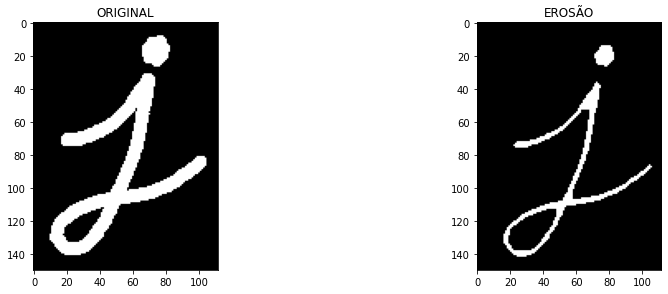

In [173]:
img = binarize(imagem)
image_erosion = erosion(img, structure_element)

fig = plt.figure(figsize=(6.4 * 3, 4.8 * 3), constrained_layout=False)
# imagem original
fig1 = fig.add_subplot(1, 5, 1)
fig1.imshow(img, cmap="gray")
plt.title("ORIGINAL")

# Erosão
fig3 = fig.add_subplot(1, 5, 3)
fig3.imshow(image_erosion, cmap="gray")
plt.title("EROSÃO")

# **Dilatação**

> A dilatação é o oposto da erosão. Por tanto, no local onde o elemento estruturante
estiver passando (contorno dos pixels brancos) todos píxeis pretos serão
transformados em brancos. Ou seja, para todo (x,y) = 0 onde o elemento
estruturante estiver passando, serão transformados em (x,y) = 1.




In [174]:
def dilate(image, structure_element):
    img = image
    shape_img = img.shape
    element_size = len(structure_element) - 2
    image_size = np.pad(array=img, pad_width=element_size, mode='constant')
    shape_element = image_size.shape
    alt, width = (shape_element[0] - shape_img[0]), (shape_element[1] - shape_img[1])
    submatrizes = np.array([image_size[i:(i + len(structure_element)), j:(j + len(structure_element))]
        for i in range(shape_element[0] - alt) for j in range(shape_element[1] - width)]) 
    dilated_image = np.array([255 if (i == structure_element).any() else 0 for i in submatrizes])
    dilated_image = dilated_image.reshape(shape_img)
    return dilated_image

Text(0.5, 1.0, 'DILATÇÃO')

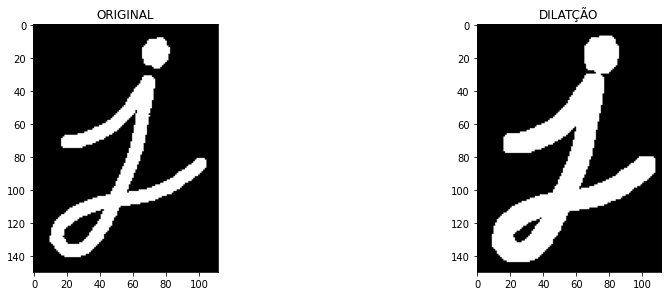

In [175]:
img = binarize(imagem)
image_dilatada = dilate(img, structure_element)

fig = plt.figure(figsize=(6.4 * 3, 4.8 * 3), constrained_layout=False)
# image original
fig1 = fig.add_subplot(1, 5, 1)
fig1.imshow(img, cmap="gray")
plt.title("ORIGINAL")

# Dilatação
fig3 = fig.add_subplot(1, 5, 3)
fig3.imshow(image_dilatada, cmap="gray")
plt.title("DILATÇÃO")

# **Abertura**


> A operação de abertura representa a erosão seguida da dilatação. Como a erosão é
capaz de remover detalhes que sejam menores que o elemento estruturante, e a
dilatação é capaz de expandir elementos, quando se utiliza a abertura podemos
remover ruídos externos à região de interesse.



In [176]:
def opening(image, structure_element):
    image_erosion = erosion(image, structure_element)
    dilated_image = dilate(image_erosion, structure_element)
    return dilated_image

Text(0.5, 1.0, 'opening')

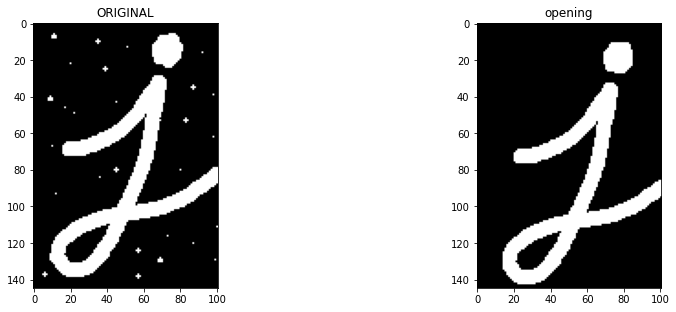

In [177]:
img_opening = binarize(image_abertura)
image_opening = opening(img_opening, structure_element)

fig = plt.figure(figsize=(6.4 * 3, 4.8 * 3), constrained_layout=False)
# image original
fig1 = fig.add_subplot(1, 5, 1)
fig1.imshow(img_opening, cmap="gray")
plt.title("ORIGINAL")

# opening
fig3 = fig.add_subplot(1, 5, 3)
fig3.imshow(image_opening, cmap="gray")
plt.title("opening")

# **Fechamento**


> A operação de fechamento é a sequência inversa da abertura. Executa-se uma
dilatação seguida de uma erosão. Dessa forma, conseguimos eliminar ruídos
internos à região de interesse.



In [178]:
def closing(image, structure_element):
    dilated_image = dilate(image, structure_element)
    image_erosion = erosion(dilated_image, structure_element)
    return image_erosion

Text(0.5, 1.0, 'closing')

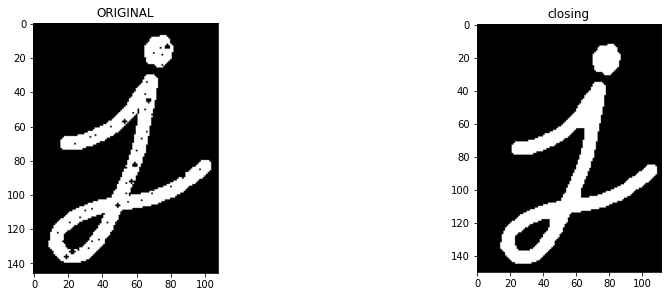

In [179]:
img_closing = binarize(image_fechamento)
image_closing = closing(image=img, structure_element=structure_element)

fig = plt.figure(figsize=(6.4 * 3, 4.8 * 3), constrained_layout=False)
# image original
fig1 = fig.add_subplot(1, 5, 1)
fig1.imshow(img_closing, cmap="gray")
plt.title("ORIGINAL")

# closing
fig3 = fig.add_subplot(1, 5, 3)
fig3.imshow(image_closing, cmap="gray")
plt.title("closing")